In [13]:
import pandas as pd
import spacy 
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv("Tweets.csv") 
print(df[['text', 'airline_sentiment']].head())

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


Loading up the relevant libraries.

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text.lower())  
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in STOP_WORDS]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

In [10]:
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_len'] = df['char_count'] / (df['word_count'] + 1)
df['exclam_count'] = df['text'].apply(lambda x: x.count('!'))
df['question_count'] = df['text'].apply(lambda x: x.count('?'))
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [12]:
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

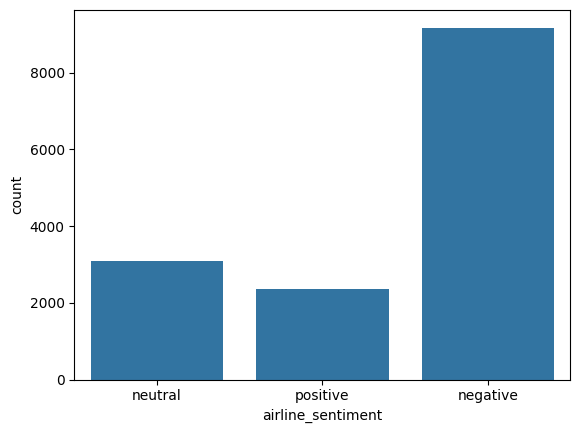

In [14]:
sns.countplot(data=df, x='airline_sentiment')
plt.show()